In [59]:
import sys
sys.path.append('../src')

import importlib
import dyn_accept_loop as dal
import logreg_augmented as lra
importlib.reload(dal)

import matplotlib.pyplot as plt

import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import torch

## Test importable Dynamic Acceptance Loop

Itteration: 0) Accepted: 1822 | Denied: 4253 - New train set size: (16822, 68)
Itteration: 1) Accepted: 1822 | Denied: 4253 - New train set size: (18644, 68)
Itteration: 2) Accepted: 1822 | Denied: 4253 - New train set size: (20466, 68)
Itteration: 3) Accepted: 1822 | Denied: 4253 - New train set size: (22288, 68)
Itteration: 4) Accepted: 1822 | Denied: 4253 - New train set size: (24110, 68)
Itteration: 5) Accepted: 1822 | Denied: 4253 - New train set size: (25932, 68)
Itteration: 6) Accepted: 1822 | Denied: 4253 - New train set size: (27754, 68)
Itteration: 7) Accepted: 1822 | Denied: 4253 - New train set size: (29576, 68)
Itteration: 8) Accepted: 1822 | Denied: 4253 - New train set size: (31398, 68)
Itteration: 9) Accepted: 1822 | Denied: 4253 - New train set size: (33220, 68)
Itteration: 10) Accepted: 1822 | Denied: 4253 - New train set size: (35042, 68)
Itteration: 11) Accepted: 1822 | Denied: 4253 - New train set size: (36864, 68)
Itteration: 12) Accepted: 1822 | Denied: 4253 - Ne

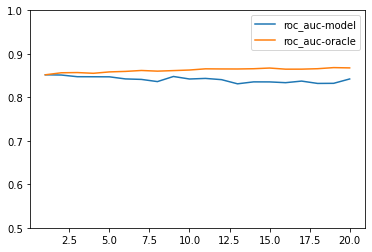

In [47]:
n_years = 20

model = lgbm.LGBMClassifier() #DecisionTreeClassifier(min_samples_leaf=40) #lgbm.LGBMClassifier() #LogisticRegression(max_iter=400)

sim = dal.Simulate_acceptance_loop("gmsc.csv", model, 0.1, 0.1, n_years, enc_features=False)
results_generator = sim.run()

metrics = None
for iteration in results_generator:
    print(f'Itteration: {iteration[0]}) Accepted: {iteration[1].count(True)} | Denied: {iteration[1].count(False)} - New train set size: {iteration[2]}')
    metrics = iteration[3]
    
x = range(1, n_years + 1)
plt.plot(x, metrics["model"]["holdout"]['roc_auc'], label = 'roc_auc-model')
plt.plot(x, metrics["oracle"]["holdout"]['roc_auc'], label = 'roc_auc-oracle')
#plt.plot(x, results["holdout"]['precision'], label = 'precision')
#plt.plot(x, results["holdout"]['f1'], label = 'f1')
#plt.plot(x, results["holdout"]['accuracy'], label = 'accuracy')
plt.legend()
plt.ylim([0.5, 1.0])
plt.show()

## Test importable Autoencoder

In [48]:
import autoencoder as aenc
import importlib
importlib.reload(aenc)

<module 'autoencoder' from 'c:\\Projects\\Information-Systems-Seminar\\reject-infer-autoencoder\\notebooks\\../src\\autoencoder.py'>

Autoencoder(
  (enc): ModuleList(
    (0): Linear(in_features=68, out_features=55, bias=True)
    (1): Linear(in_features=55, out_features=40, bias=True)
  )
  (dec): ModuleList(
    (0): Linear(in_features=40, out_features=55, bias=True)
    (1): Linear(in_features=55, out_features=68, bias=True)
  )
)
Epoch 1 of 20, Train Loss: 0.755
Epoch 2 of 20, Train Loss: 0.591
Epoch 3 of 20, Train Loss: 0.572
Epoch 4 of 20, Train Loss: 0.568
Epoch 5 of 20, Train Loss: 0.565
Epoch 6 of 20, Train Loss: 0.564
Epoch 7 of 20, Train Loss: 0.563
Epoch 8 of 20, Train Loss: 0.563
Epoch 9 of 20, Train Loss: 0.562
Epoch 10 of 20, Train Loss: 0.561
Epoch 11 of 20, Train Loss: 0.561
Epoch 12 of 20, Train Loss: 0.561
Epoch 13 of 20, Train Loss: 0.560
Epoch 14 of 20, Train Loss: 0.560
Epoch 15 of 20, Train Loss: 0.560
Epoch 16 of 20, Train Loss: 0.559
Epoch 17 of 20, Train Loss: 0.559
Epoch 18 of 20, Train Loss: 0.559
Epoch 19 of 20, Train Loss: 0.559
Epoch 20 of 20, Train Loss: 0.559


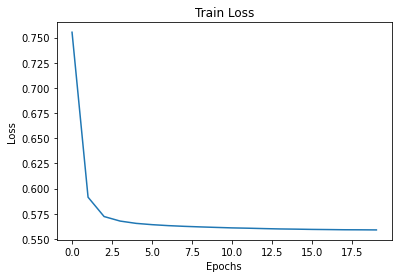

In [61]:
BATCH_SIZE = 1000
EPOCHS = 20

dataset = aenc.CreditscoringDataset("gmsc.csv")      # load and prepare Dataset to Tensor
data_loader = aenc.DataLoader(                       # create Dataloader for batching
    dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)

shape = [dataset.x.shape[1], 55, 40, 55, dataset.x.shape[1]]  # define shape of Autoencoder
net = aenc.Autoencoder(shape)
print(net)
net.to("cpu")

train_loss = aenc.train(net, data_loader, EPOCHS)               

plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
# Use trained Autoencoder
with torch.no_grad():
    print(net.encode(torch.rand(10, 68)))

tensor([[0.5331, 1.2034, 0.4091, 0.5958, 0.4521, 0.0815, 1.1144, 0.5267, 0.3226,
         1.0890, 1.3357, 0.0000, 0.5864, 1.6515, 0.8185, 1.4820, 0.8401, 0.0000,
         1.9318, 0.7730],
        [0.2238, 1.3025, 0.5040, 1.4982, 0.3833, 0.0000, 1.6878, 1.0483, 1.0860,
         1.2475, 1.5237, 0.5341, 1.0013, 1.4102, 1.3380, 1.6233, 1.3297, 0.0000,
         1.6822, 1.1371],
        [1.5907, 1.9225, 1.1669, 1.5267, 0.9853, 0.6198, 0.6553, 1.0212, 1.5926,
         1.7267, 2.3923, 0.8081, 0.9168, 1.8998, 0.9668, 1.1141, 0.8389, 0.8152,
         1.8990, 0.3530],
        [0.9352, 1.8761, 1.1248, 1.2468, 0.3903, 0.5225, 1.1769, 1.2551, 1.2557,
         1.5612, 2.4387, 1.1488, 0.9080, 0.9372, 1.2107, 0.7984, 0.3952, 0.6240,
         1.6214, 1.1818],
        [1.4018, 1.6206, 1.2932, 1.3885, 0.3759, 1.4199, 1.0626, 0.9025, 0.4013,
         1.1553, 2.1911, 0.1558, 1.0536, 1.3317, 0.4294, 0.5037, 1.2748, 0.1306,
         1.4236, 0.9085],
        [0.5639, 1.0265, 0.2864, 0.0622, 0.6123, 0.6585, 0.4

Itteration: 0) Accepted: 1822 | Denied: 4253 - New train set size: (16822, 40)
Itteration: 1) Accepted: 1822 | Denied: 4253 - New train set size: (18644, 40)
Itteration: 2) Accepted: 1822 | Denied: 4253 - New train set size: (20466, 40)
Itteration: 3) Accepted: 1822 | Denied: 4253 - New train set size: (22288, 40)
Itteration: 4) Accepted: 1822 | Denied: 4253 - New train set size: (24110, 40)
Itteration: 5) Accepted: 1822 | Denied: 4253 - New train set size: (25932, 40)
Itteration: 6) Accepted: 1822 | Denied: 4253 - New train set size: (27754, 40)
Itteration: 7) Accepted: 1822 | Denied: 4253 - New train set size: (29576, 40)
Itteration: 8) Accepted: 1822 | Denied: 4253 - New train set size: (31398, 40)
Itteration: 9) Accepted: 1822 | Denied: 4253 - New train set size: (33220, 40)
Itteration: 10) Accepted: 1822 | Denied: 4253 - New train set size: (35042, 40)
Itteration: 11) Accepted: 1822 | Denied: 4253 - New train set size: (36864, 40)
Itteration: 12) Accepted: 1822 | Denied: 4253 - Ne

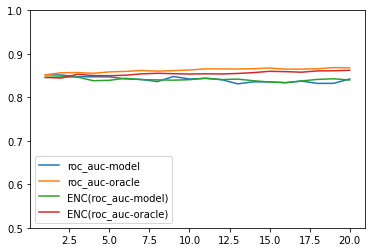

In [62]:
n_years = 20

model = lgbm.LGBMClassifier() #DecisionTreeClassifier(min_samples_leaf=40) #lgbm.LGBMClassifier() #LogisticRegression(max_iter=400)

sim = dal.Simulate_acceptance_loop("gmsc.csv", model, 0.1, 0.1, n_years, enc_features=True, encoder=net)
results_generator = sim.run()

metrics_encoded = None
for iteration in results_generator:
    print(f'Itteration: {iteration[0]}) Accepted: {iteration[1].count(True)} | Denied: {iteration[1].count(False)} - New train set size: {iteration[2]}')
    metrics_encoded = iteration[3]

x = range(1, n_years + 1)
plt.plot(x, metrics["model"]["holdout"]['roc_auc'], label = 'roc_auc-model')
plt.plot(x, metrics["oracle"]["holdout"]['roc_auc'], label = 'roc_auc-oracle')
plt.plot(x, metrics_encoded["model"]["holdout"]['roc_auc'], label = 'ENC(roc_auc-model)')
plt.plot(x, metrics_encoded["oracle"]["holdout"]['roc_auc'], label = 'ENC(roc_auc-oracle)')
#plt.plot(x, results["holdout"]['precision'], label = 'precision')
#plt.plot(x, results["holdout"]['f1'], label = 'f1')
#plt.plot(x, results["holdout"]['accuracy'], label = 'accuracy')
plt.legend()
plt.ylim([0.5, 1.0])
plt.show()